In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset consists of a telecom company's customer churn details. The dataset can be used to find the relationship of customer churn with other features and the Company can take preventve measures to minimise Customer Churn. Also it can be used to prepare a machine learning model to predict customer churn.

In [69]:
df = pd.read_csv("telecom customer churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [70]:
df.shape

(3333, 21)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Let's look at distribution of all the features

In [72]:
df["state"].nunique()

51

In [73]:
df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
CO     66
WA     66
NV     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
NE     61
OK     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

The company has customers from 51 different states

Text(0.5, 1.0, 'Number of customers as per state')

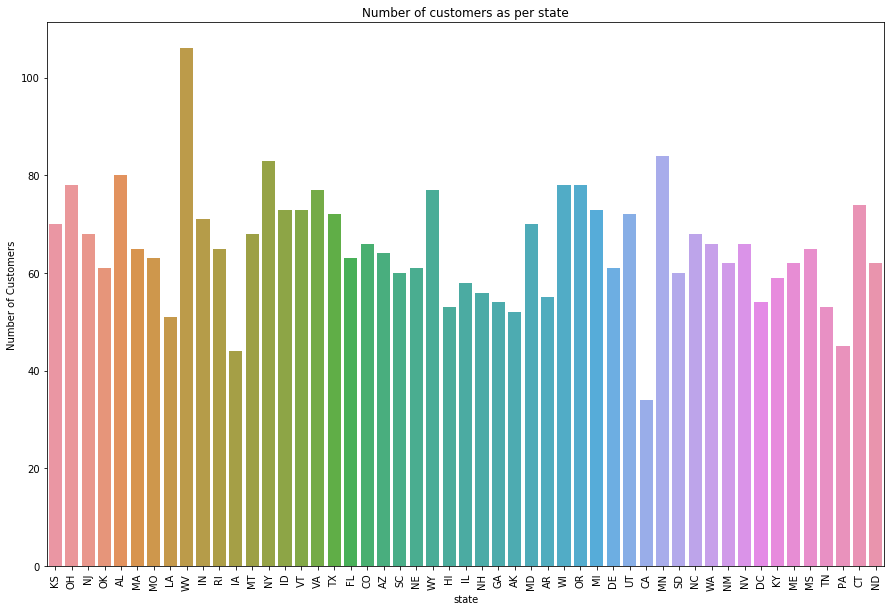

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(df["state"])
plt.xlabel('state')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')
plt.title('Number of customers as per state')

Highest number of customers belong to state WV and least number of customers belong to CA

Text(0.5, 1.0, 'Number of Customers as per Active Days')

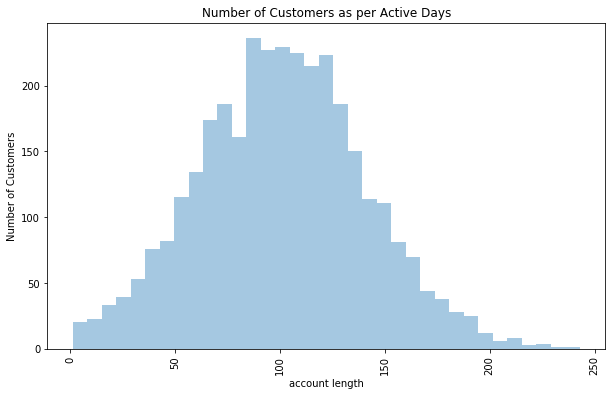

In [75]:
plt.figure(figsize=(10,6))
sns.distplot(df["account length"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('account length')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per Active Days')

The distribution of number of active days of a customer approximates a normal distribution with most of the customers have been active since around 100 days

415    1655
510     840
408     838
Name: area code, dtype: int64

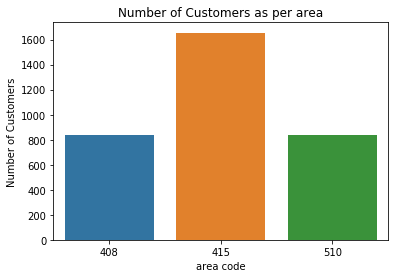

In [76]:
sns.countplot(df["area code"])
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per area')
df['area code'].value_counts()

Almost half of total customers belong to area code 415

In [77]:
df["phone number"].nunique()

3333

Phone Numner feature doesn't provide any analytical info so let's drop it

In [78]:
df.drop("phone number",axis=1,inplace=True)

no     3010
yes     323
Name: international plan, dtype: int64

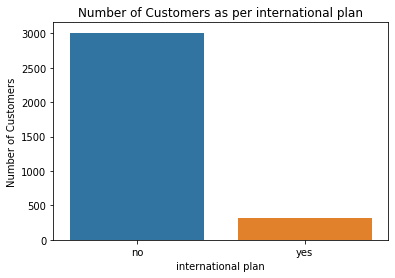

In [79]:
sns.countplot(df["international plan"])
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per international plan')
df['international plan'].value_counts()

Very few customers (323 out of 3333) have international plan

no     2411
yes     922
Name: voice mail plan, dtype: int64

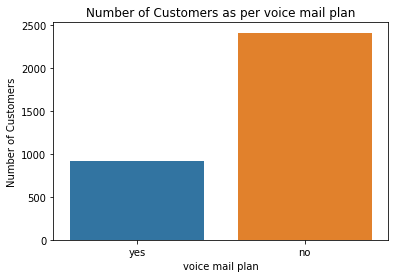

In [80]:
sns.countplot(df["voice mail plan"])
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per voice mail plan')
df['voice mail plan'].value_counts()

922 out of 3333 customers have voice mail plan

Let's look into the distribution of vmail messages among vmail users

Text(0.5, 1.0, 'Number of vmail users as per average number of vmail messages per month')

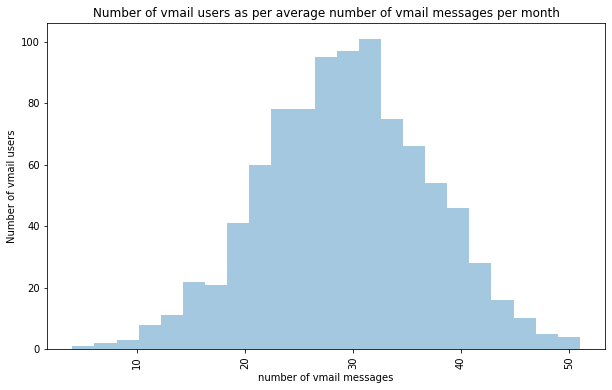

In [81]:
vmail = df[df["number vmail messages"]!=0]
plt.figure(figsize=(10,6))
sns.distplot(vmail["number vmail messages"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('number of vmail messages')
plt.ylabel('Number of vmail users')
plt.title('Number of vmail users as per average number of vmail messages per month')

The distribution of number of vamil messeges per month approximates a normal distribution with most customers using around 30 voice mail messages per month on an average

Text(0.5, 1.0, 'Number of Customers as per day calling minutes on an average')

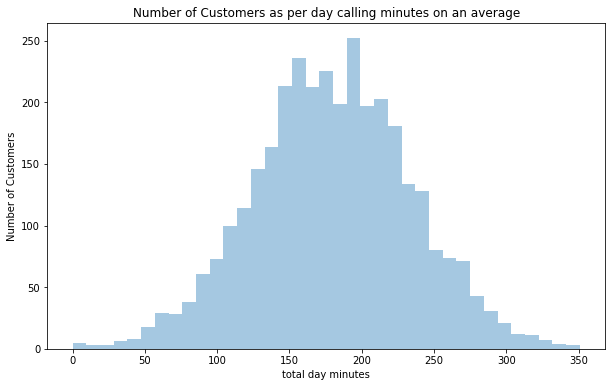

In [82]:
plt.figure(figsize=(10,6))
sns.distplot(df["total day minutes"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total day minutes')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per day calling minutes on an average')

The distribution of per day average calling minutes approximates a normal distribution with most of the customers per day average calling minutes being around 170 minutes

Text(0.5, 1.0, 'Number of Customers as per total day calls on an average')

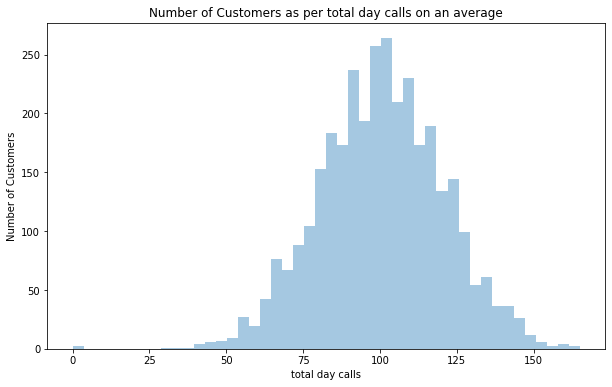

In [83]:
plt.figure(figsize=(10,6))
sns.distplot(df["total day calls"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total day calls')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total day calls on an average')

The distribution of per day average number of calls approximates a normal distribution with most of the customers per day average number of calls being around 100 calls

Text(0.5, 1.0, 'Number of Customers as per total day charge for calls on an average')

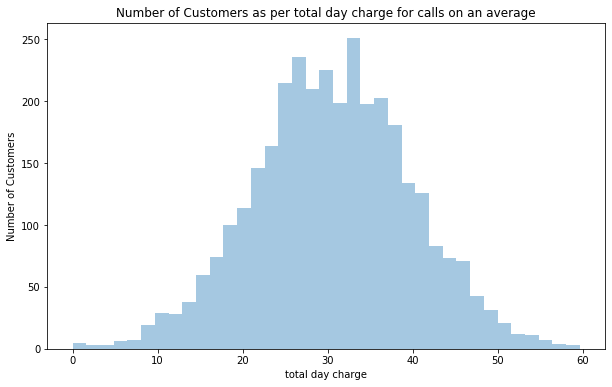

In [84]:
plt.figure(figsize=(10,6))
sns.distplot(df["total day charge"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total day charge')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total day charge for calls on an average')

The distribution of per day average charge for calls approximates a normal distribution with most of the customers' per day average charge for calls being around 30 dollars

Text(0.5, 1.0, 'Number of Customers as per evening calling minutes on an average')

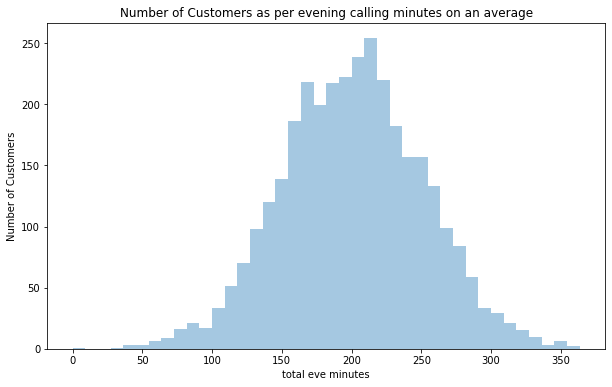

In [85]:
plt.figure(figsize=(10,6))
sns.distplot(df["total eve minutes"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total eve minutes')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per evening calling minutes on an average')

The distribution of evening average calling minutes approximates a normal distribution with most of the customers evening average calling minutes being around 200 minutes

Text(0.5, 1.0, 'Number of Customers as per total evening calls on an average')

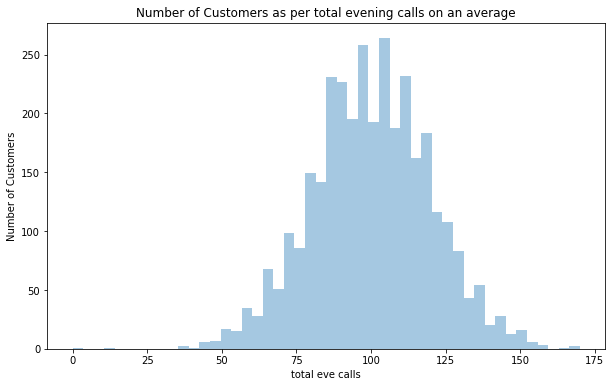

In [86]:
plt.figure(figsize=(10,6))
sns.distplot(df["total eve calls"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total eve calls')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total evening calls on an average')

The distribution of per evening average number of calls approximates a normal distribution with most of the customers per evening average number of calls being around 100 calls

Text(0.5, 1.0, 'Number of Customers as per total evening charge for calls on an average')

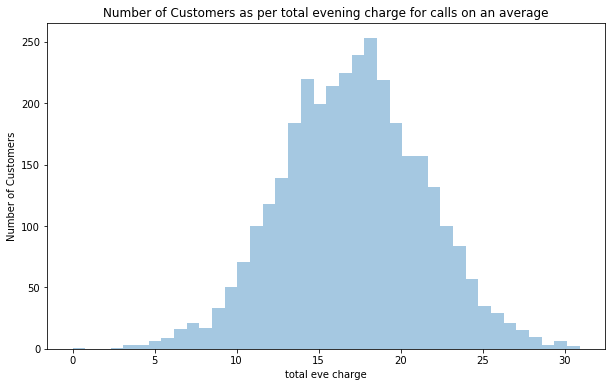

In [87]:
plt.figure(figsize=(10,6))
sns.distplot(df["total eve charge"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total eve charge')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total evening charge for calls on an average')

The distribution of per evening average charge for calls approximates a normal distribution with most of the customers' per evening average charge for calls being around 17 dollars

Text(0.5, 1.0, 'Number of Customers as per night calling minutes on an average')

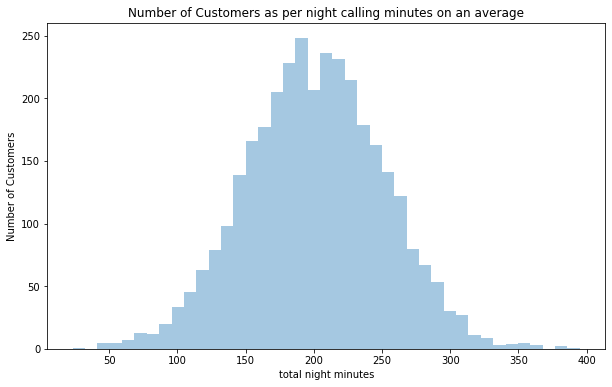

In [88]:
plt.figure(figsize=(10,6))
sns.distplot(df["total night minutes"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total night minutes')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per night calling minutes on an average')

The distribution of night average calling minutes approximates a normal distribution with most of the customers' night average calling minutes being around 200 minutes

Text(0.5, 1.0, 'Number of Customers as per total night calls on an average')

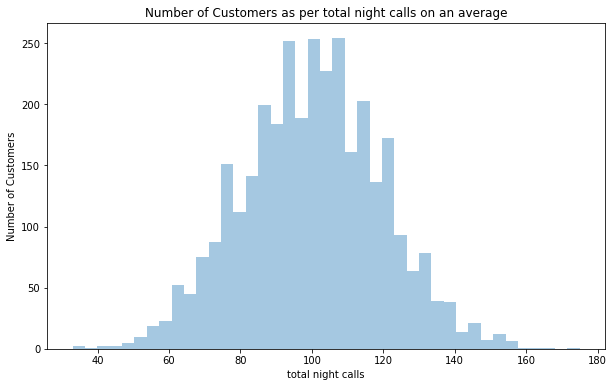

In [89]:
plt.figure(figsize=(10,6))
sns.distplot(df["total night calls"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total night calls')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total night calls on an average')

The distribution of per night average number of calls approximates a normal distribution with most of the customers' per evening night number of calls being around 100 calls

Text(0.5, 1.0, 'Number of Customers as per total night charge for calls on an average')

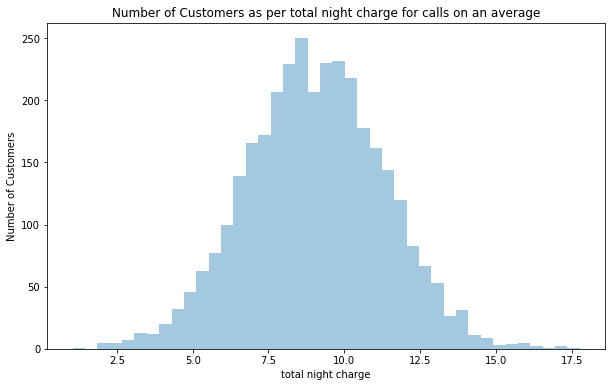

In [90]:
plt.figure(figsize=(10,6))
sns.distplot(df["total night charge"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total night charge')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total night charge for calls on an average')

The distribution of per night average charge for calls approximates a normal distribution with most of the customers' per night average charge for calls being around 8 dollars

Text(0.5, 1.0, 'Number of Customers as per total intl calling minutes')

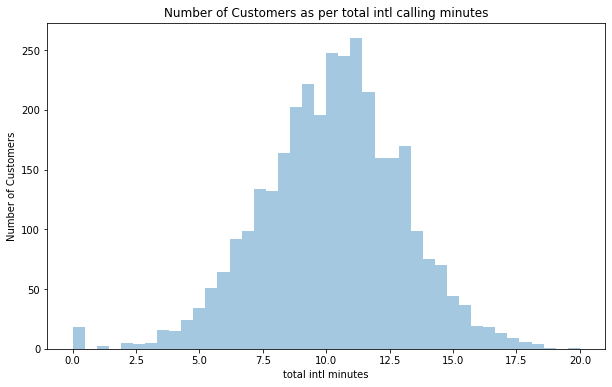

In [91]:
plt.figure(figsize=(10,6))
sns.distplot(df["total intl minutes"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total intl minutes')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total intl calling minutes')

The distribution of total international calling minutes approximates a normal distribution with most of the customers' total international calling minutes being around 11 minutes


Text(0.5, 1.0, 'Number of Customers as per total intl calls')

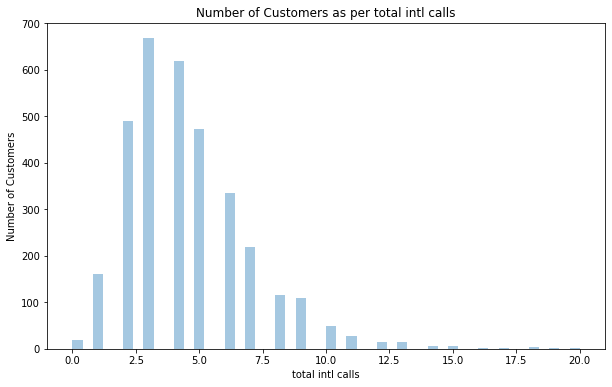

In [92]:
plt.figure(figsize=(10,6))
sns.distplot(df["total intl calls"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total intl calls')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total intl calls')

The distribution of total international number of calls approximates a normal distribution skewed to right with most of the customers' total international number of calls being around 3-4 calls

Text(0.5, 1.0, 'Number of Customers as per total intl charge for calls on an average')

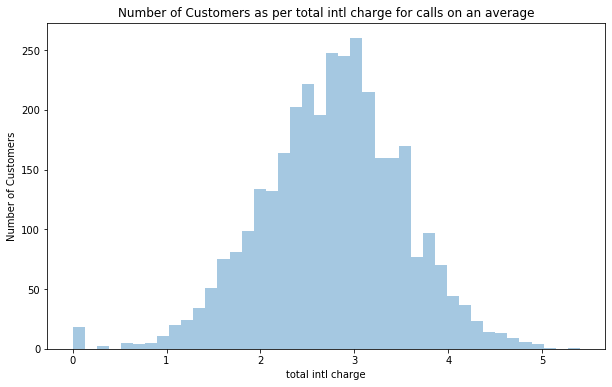

In [93]:
plt.figure(figsize=(10,6))
sns.distplot(df["total intl charge"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('total intl charge')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total intl charge for calls on an average')

The distribution of total international charge for calls approximates a normal distribution with most of the customers' total international charge for calls being around 3 dollars

Text(0.5, 1.0, 'Number of Customers as per total customer service calls')

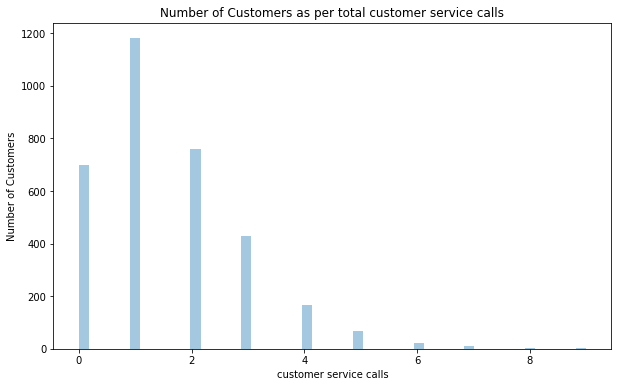

In [94]:
plt.figure(figsize=(10,6))
sns.distplot(df["customer service calls"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('customer service calls')
plt.ylabel('Number of Customers')
plt.title('Number of Customers as per total customer service calls')

Distribution of number of total customer service calls is skewed to the right, with most customers making around 1-2 calls

False    2850
True      483
Name: churn, dtype: int64

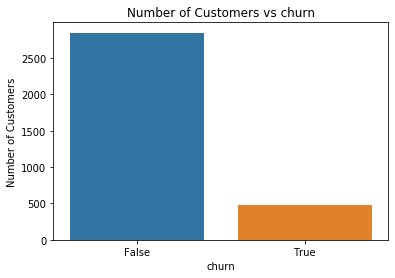

In [95]:
sns.countplot(df["churn"])
plt.ylabel('Number of Customers')
plt.title('Number of Customers vs churn')
df['churn'].value_counts()

483 customers out of 3333 belong to churn category

Let's look into the relationship of churn vs different features - Bivariate analysis

Text(0.5, 1.0, 'churn vs total customer service calls - Boxplot')

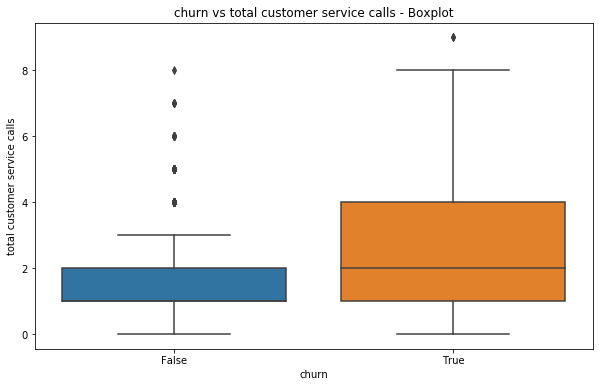

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="customer service calls",data=df)
plt.ylabel('total customer service calls')
plt.title('churn vs total customer service calls - Boxplot')

The customers who left the company services had relatively higher number of total customer service calls, which shows they had issues

Text(0.5, 1.0, 'churn vs total intl charge for calls')

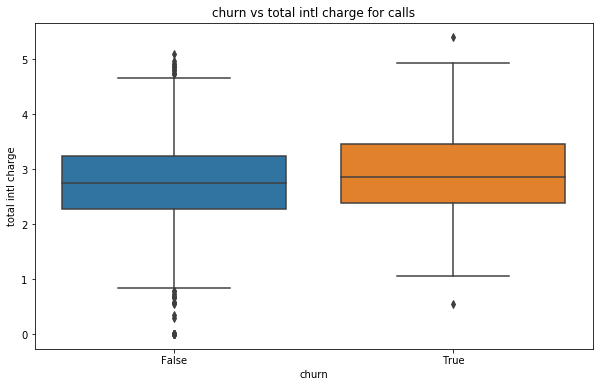

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total intl charge",data=df)
plt.ylabel('total intl charge')
plt.title('churn vs total intl charge for calls')

Text(0.5, 1.0, 'churn vs total number of international calls')

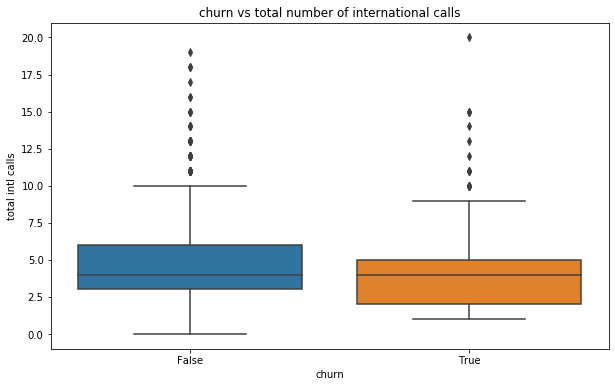

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total intl calls",data=df)
plt.ylabel('total intl calls')
plt.title('churn vs total number of international calls')

Text(0.5, 1.0, 'churn vs total number of international calling minutes')

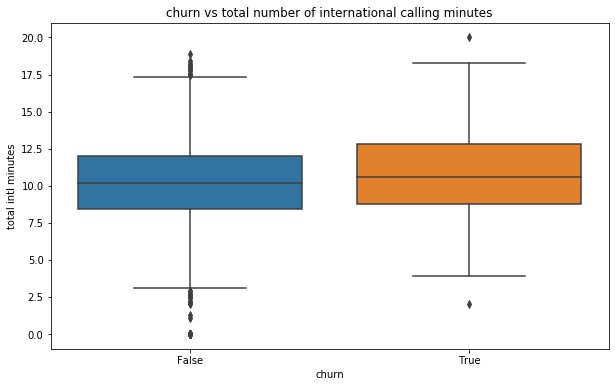

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total intl minutes",data=df)
plt.ylabel('total intl minutes')
plt.title('churn vs total number of international calling minutes')

The above plots show that customer churn has little to do with international number of calls, minutes or charges

Text(0.5, 1.0, 'churn vs total night charge for calling minutes')

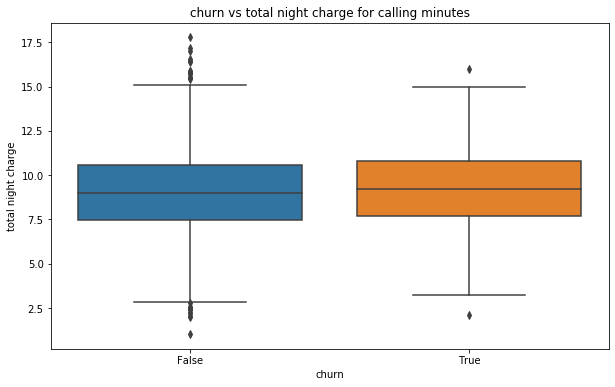

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total night charge",data=df)
plt.ylabel('total night charge')
plt.title('churn vs total night charge for calling minutes')

Text(0.5, 1.0, 'churn vs total number of night calls')

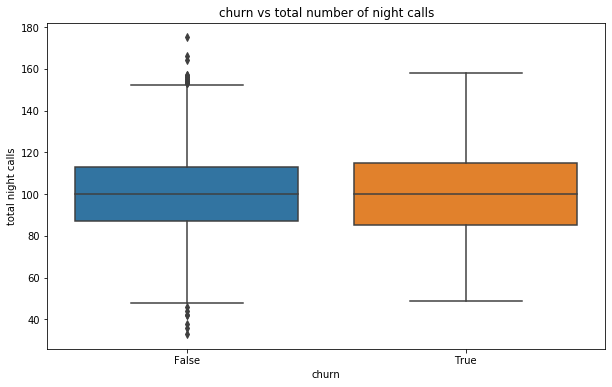

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total night calls",data=df)
plt.ylabel('total night calls')
plt.title('churn vs total number of night calls')

Text(0.5, 1.0, 'churn vs total number of night calling minutes')

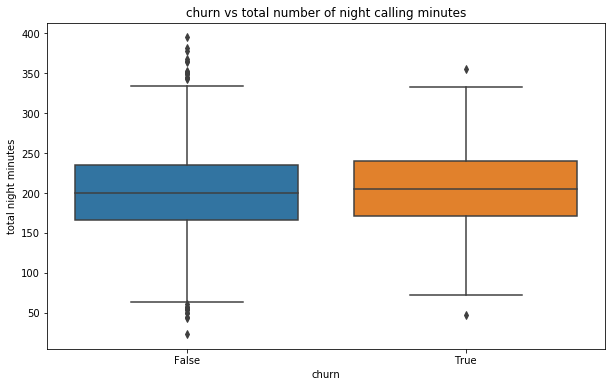

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total night minutes",data=df)
plt.ylabel('total night minutes')
plt.title('churn vs total number of night calling minutes')

The above plots show that customer churn has little to do with night number of calls, minutes or charges

Text(0.5, 1.0, 'churn vs total evening charge for calling minutes')

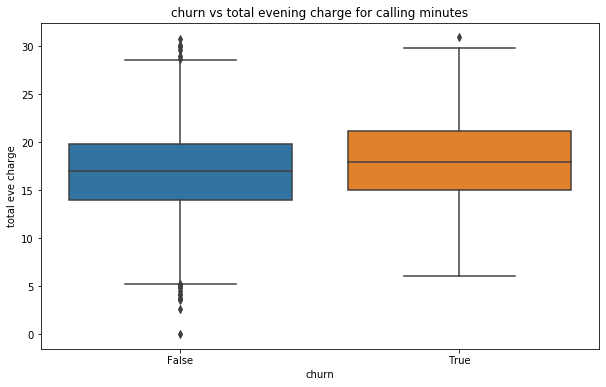

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total eve charge",data=df)
plt.ylabel('total eve charge')
plt.title('churn vs total evening charge for calling minutes')

Text(0.5, 1.0, 'churn vs total evening number of calls')

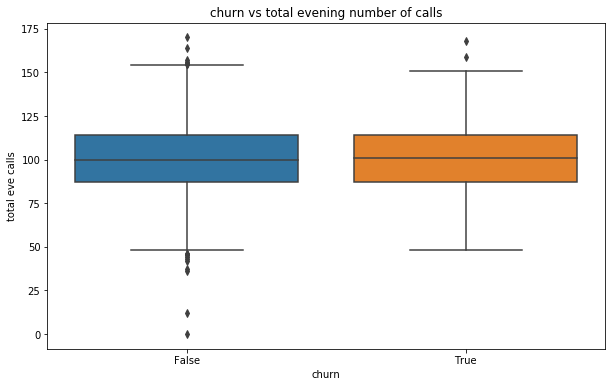

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total eve calls",data=df)
plt.ylabel('total eve calls')
plt.title('churn vs total evening number of calls')

Text(0.5, 1.0, 'churn vs total number of evening calling minutes')

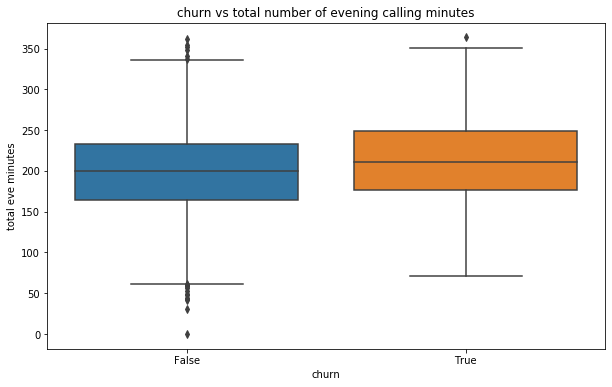

In [105]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total eve minutes",data=df)
plt.ylabel('total eve minutes')
plt.title('churn vs total number of evening calling minutes')

The above plots show that customer churn has little to do with evening number of calls, minutes or charges

Text(0.5, 1.0, 'churn vs total day charge for calling minutes')

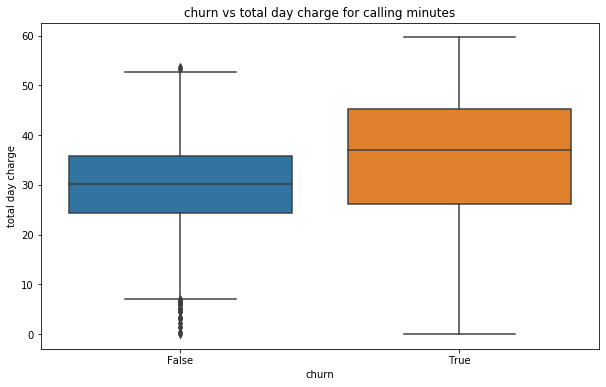

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total day charge",data=df)
plt.ylabel('total day charge')
plt.title('churn vs total day charge for calling minutes')

Text(0.5, 1.0, 'churn vs total day number of calls')

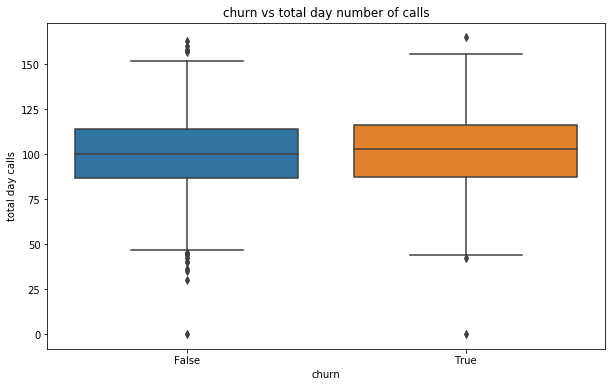

In [107]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total day calls",data=df)
plt.ylabel('total day calls')
plt.title('churn vs total day number of calls')

Text(0.5, 1.0, 'churn vs total number of day calling minutes')

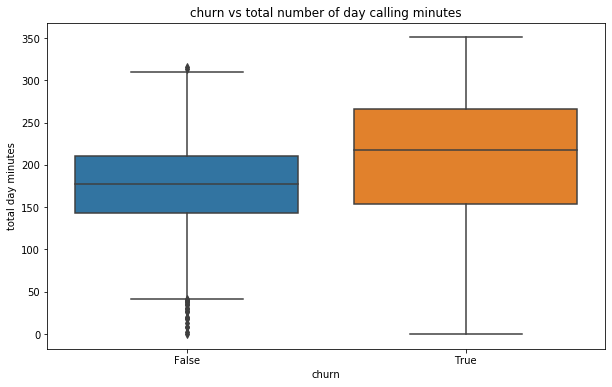

In [108]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="total day minutes",data=df)
plt.ylabel('total day minutes')
plt.title('churn vs total number of day calling minutes')

The above plots shows that cutomers who churned had relatively higher number of average day calling minutes and were charged relatively higher, so the company can reduce day calling charges to minimise churn

Text(0.5, 1.0, 'churn vs number of voicemail messages')

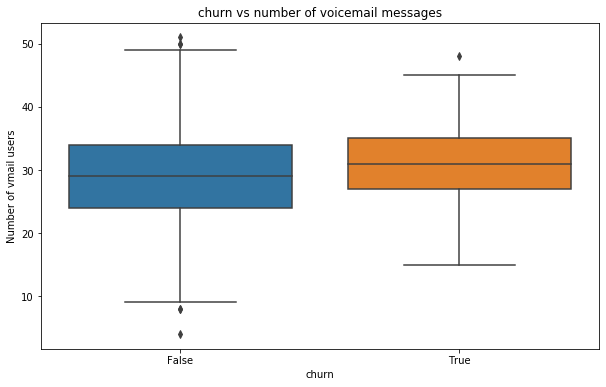

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="number vmail messages",data=vmail)
plt.ylabel('Number of vmail users')
plt.title('churn vs number of voicemail messages')

The above plot shows that vmail message service users who churned had relatively slightly higher number of voicemail messeges, so the Company may consider reducing vmail charges

Text(0.5, 1.0, 'Churn as per voice mail plan')

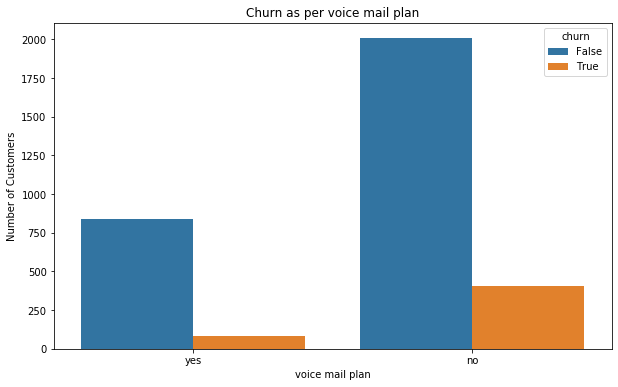

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(x="voice mail plan",hue="churn", data = df)
plt.ylabel('Number of Customers')
plt.title('Churn as per voice mail plan')

The above plot shows that most of the customers whu churned were not using vmail message service

Text(0.5, 1.0, 'Churn as per international plan')

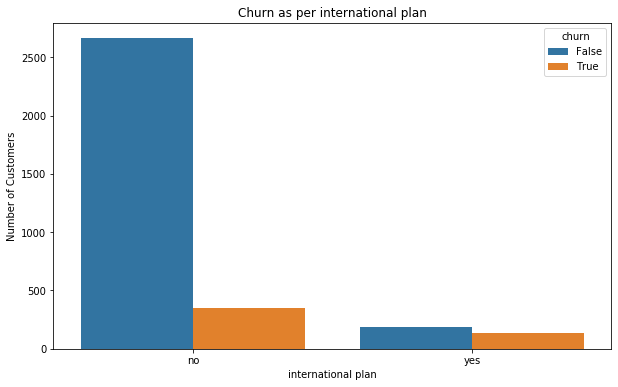

In [111]:
plt.figure(figsize=(10,6))
sns.countplot(x="international plan",hue="churn", data = df)
plt.ylabel('Number of Customers')
plt.title('Churn as per international plan')

The above plot shows that customers who were using international plans had a very high proportion of churn, so the company can consider reducing charges for international calls

Text(0.5, 1.0, 'Churn as per area')

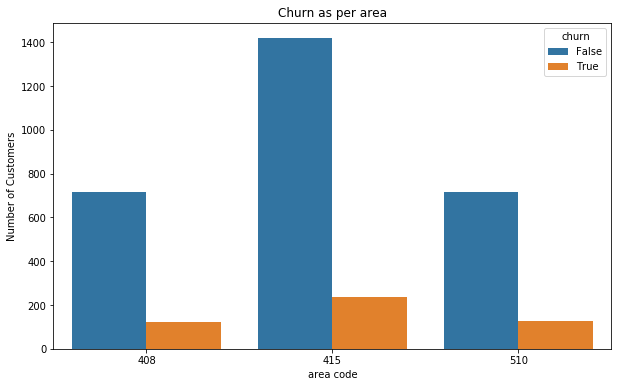

In [112]:
plt.figure(figsize=(10,6))
sns.countplot(x="area code",hue="churn", data = df)
plt.ylabel('Number of Customers')
plt.title('Churn as per area')

The aboe plot shows that churn has no relationship with area of a customer

Text(0.5, 1.0, 'churn vs number of active days')

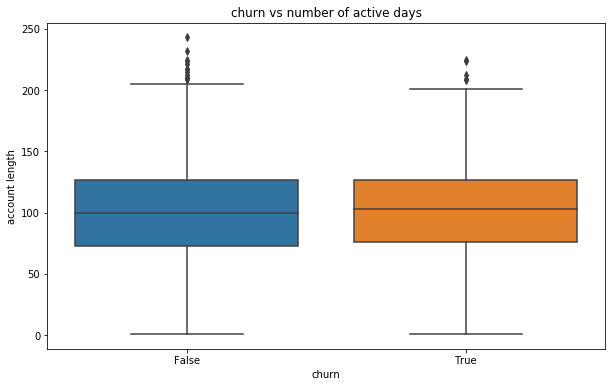

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="account length",data=df)
plt.ylabel('account length')
plt.title('churn vs number of active days')

The above plot shows that churn has nothing to do with number of active days of a customer

Text(0.5, 1.0, 'Churn as per state')

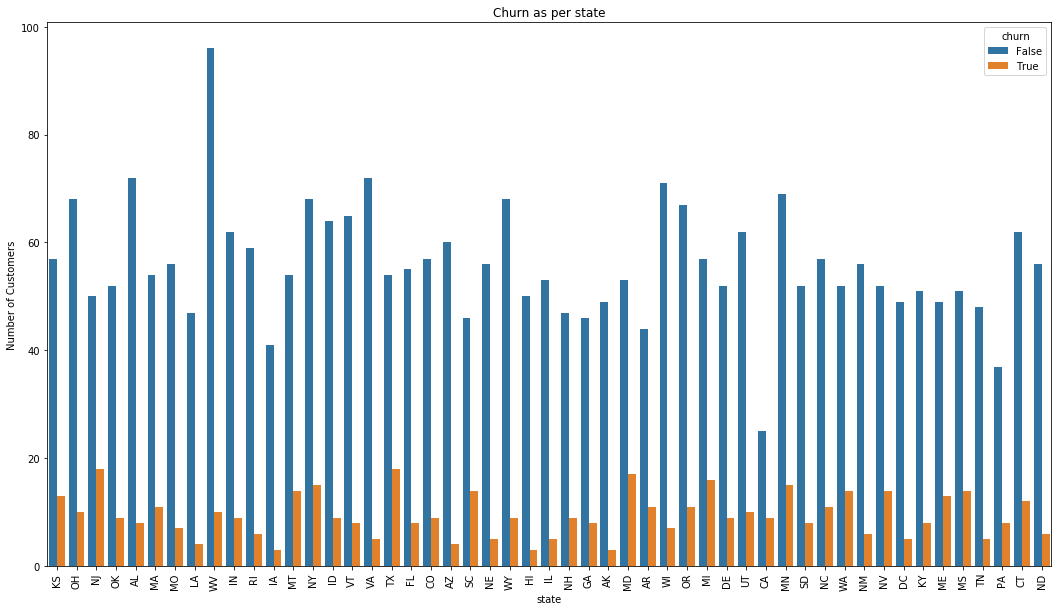

In [114]:
plt.figure(figsize=(18,10))
sns.countplot(x="state",hue="churn", data = df)
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.title('Churn as per state')

In [115]:
#Let's look at the null values present in the dataset
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Clearly there's no null value present in the dataset

In [116]:
df.shape

(3333, 20)

In [117]:
#Let's look into the skewness in the continuous features
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

Let us encode categorical features for the model

In [118]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["churn"] = le.fit_transform(df["churn"].astype('str'))
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [119]:
cat = pd.get_dummies(df)
cat

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0,0,0,0,0,0,1,0,0,1
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0,0,0,0,1,0,1,0,1,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0,0,0,0,0,0,1,0,1,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,0,0,0,0,0,0,0,1,1,0


In [120]:
cat.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT'

In [121]:
cat.drop(["state_AK","international plan_no","voice mail plan_no"],axis=1,inplace=True)

In [122]:
cat.shape

(3333, 69)

In [123]:
X=cat.drop("churn", axis=1)
y=cat["churn"]

In [124]:
#Scaling
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 0.67648946, -0.52360328,  1.23488274, ..., -0.15378117,
        -0.32758048,  1.6170861 ],
       [ 0.14906505, -0.52360328,  1.30794844, ..., -0.15378117,
        -0.32758048,  1.6170861 ],
       [ 0.9025285 , -0.52360328, -0.59175986, ..., -0.15378117,
        -0.32758048, -0.61839626],
       ...,
       [-1.83505538,  1.71881732, -0.59175986, ..., -0.15378117,
        -0.32758048, -0.61839626],
       [ 2.08295458,  1.71881732, -0.59175986, ..., -0.15378117,
         3.05268496, -0.61839626],
       [-0.67974475, -0.52360328,  1.23488274, ..., -0.15378117,
        -0.32758048,  1.6170861 ]])

Let's do Principal Component Analysis (PCA) for the input features

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (3333, 68)
Reduced shape: (3333, 5)


Finding the best random state

In [126]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.20,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 99 is 0.8950524737631185


In [127]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.20,random_state=99)

In [128]:
print(X_train.shape,"\n",X_test.shape)

(2666, 5) 
 (667, 5)


Observing performance of different classifier algorithms

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [130]:
LR = LogisticRegression()#From the GridSearchCVparameter tuning
KNN = KNeighborsClassifier()#(n_neighbors=2)
GNB = GaussianNB()
#MNB = MultinomialNB()
SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()#From the GridSearchCVparameter tuning
ABC = AdaBoostClassifier()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [131]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
#models.append(("MultinomialNB", MNB))
models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=99, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.8950524737631185


Cross val score =  0.8553910197622774


roc_auc_score =  0.5394736842105263


Classification Report
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       591
           1       1.00      0.08      0.15        76

    accuracy                           0.90       667
   macro avg       0.95      0.54      0.55       667
weighted avg       0.91      0.90      0.85       667



Confusion Matrix 
[[591   0]
 [ 70   6]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier ******************

Cross val score =  0.9559017100933269


roc_auc_score =  0.6723661946745035


Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       591
           1       0.67      0.37      0.47        76

    accuracy                           0.91       667
   macro avg       0.79      0.67      0.71       667
weighted avg       0.89      0.91      0.89       667



Confusion Matrix 
[[577  14]
 [ 48  28]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





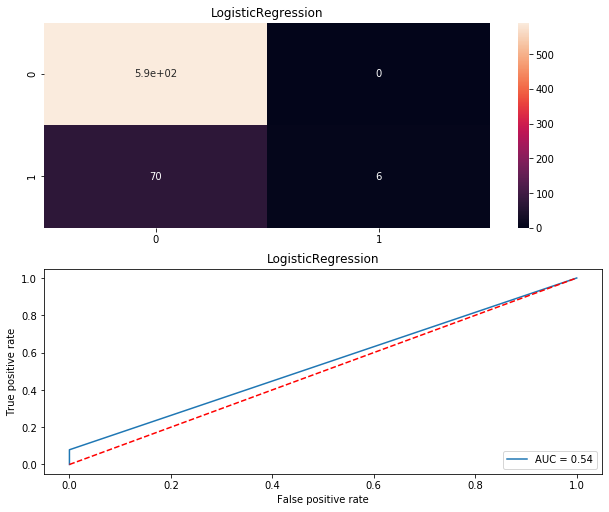

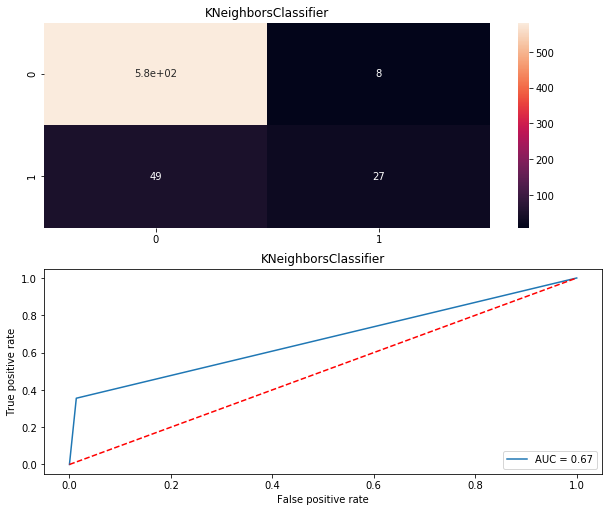

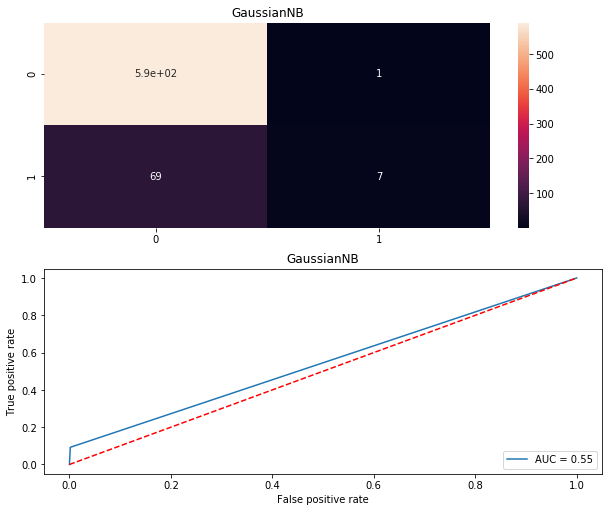

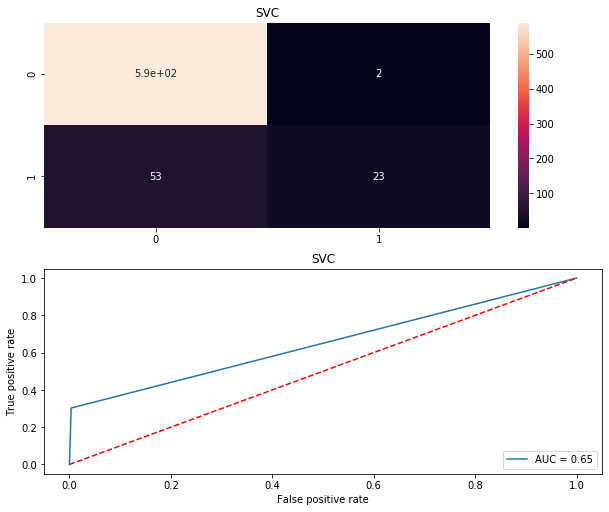

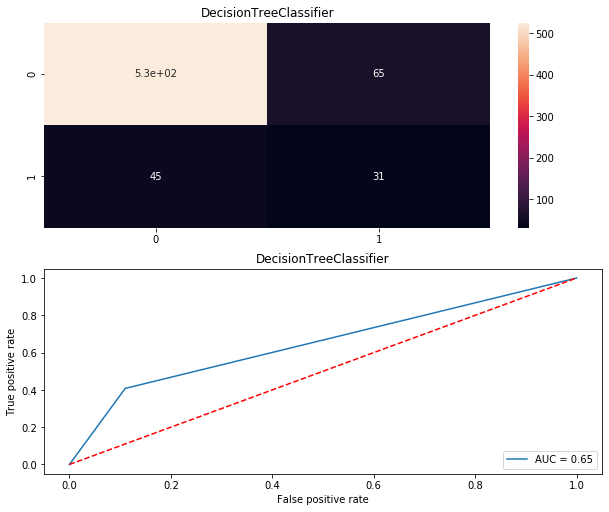

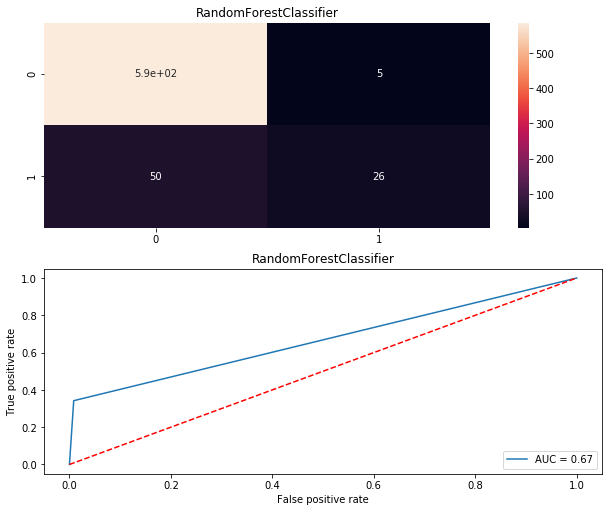

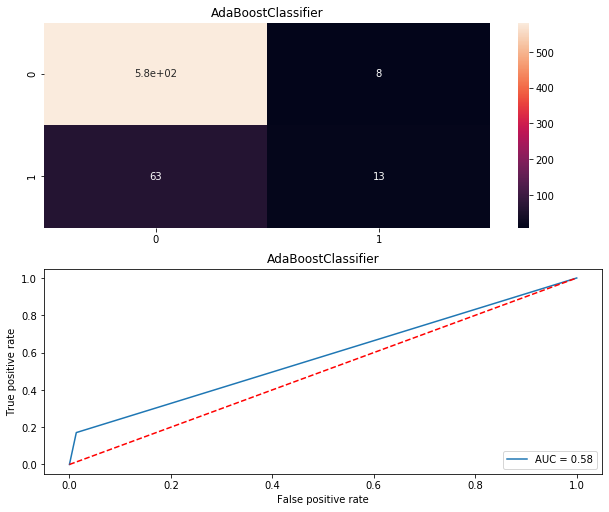

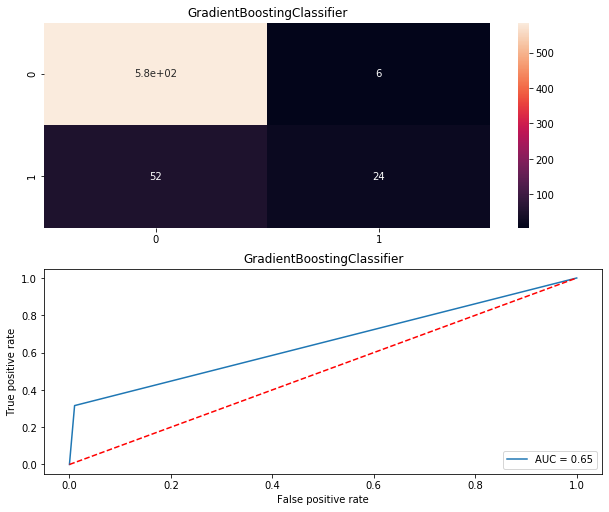

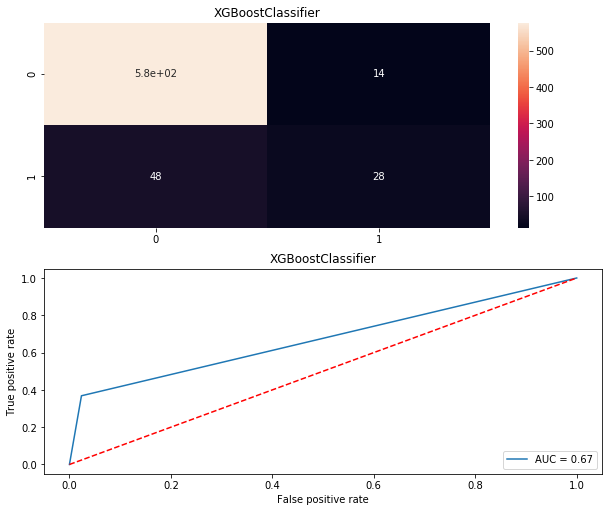

In [133]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [134]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs, 'ROC AUC Curve': rocscore})
result

,Model,Accuracy Socre,Cross val score,ROC AUC Curve
0,LogisticRegression,89.505247,85.539102,53.947368
1,KNeighborsClassifier,91.454273,87.097876,67.086339
2,GaussianNB,89.505247,60.486864,54.520661
3,SVC,91.754123,85.508712,64.962374
4,DecisionTreeClassifier,83.508246,91.810163,64.895583
5,RandomForestClassifier,91.754123,94.450019,66.682251
6,AdaBoostClassifier,89.355322,87.368866,57.875813
7,GradientBoostingClassifier,91.304348,95.020050,65.281859
8,XGBoostClassifier,90.704648,95.590171,67.236619


Clearly XGBoost gives the best generalization performance so let's find the best parameter for it

In [135]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [70,80,100],
            'learning_rate': [0.01,0.1,0.2]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_...
                                     num_parallel_tree=1,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
        

In [136]:
XGB = xgb.XGBClassifier(n_estimators=80,learning_rate=0.2)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=80, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [137]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(XGB,'Customer_Churn_Prediction.pkl')

['Customer_Churn_Prediction.pkl']